# HW 2 Problem 1

### Part A and B

step 0, loss 8.81767, training accuracy 0.16
step 100, loss 2.32214, training accuracy 0.1
step 200, loss 2.20907, training accuracy 0.24
step 300, loss 2.33724, training accuracy 0.14
step 400, loss 2.23981, training accuracy 0.12
step 500, loss 2.22459, training accuracy 0.12
step 600, loss 2.21258, training accuracy 0.24
step 700, loss 2.11167, training accuracy 0.16
step 800, loss 2.20911, training accuracy 0.22
step 900, loss 2.21868, training accuracy 0.18
step 1000, loss 2.25815, training accuracy 0.16
step 1100, loss 2.25211, training accuracy 0.16
step 1200, loss 2.19365, training accuracy 0.18
step 1300, loss 2.17355, training accuracy 0.18
step 1400, loss 2.16671, training accuracy 0.32
step 1500, loss 2.06039, training accuracy 0.32
step 1600, loss 2.19553, training accuracy 0.18
step 1700, loss 2.16408, training accuracy 0.22
step 1800, loss 1.98433, training accuracy 0.26
step 1900, loss 2.16655, training accuracy 0.2
step 2000, loss 2.13591, training accuracy 0.22
step 2

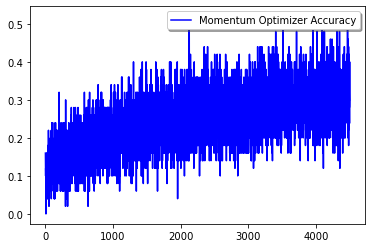

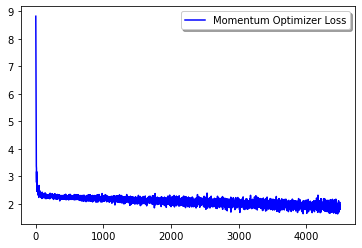

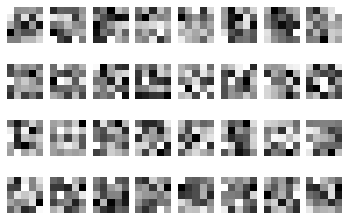

Activation1: mean 0.00643029, variance 0.000689761, 
standard dev 0.0262633, max value 0.633415, min value 0

Activation2: mean 0.0149593, variance 0.00110978 , 
standard dev 0.0333134, max value 0.633415, min value 0


In [42]:
# Name:Saif Khan

import imageio
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

#compatibility for tf v2.0
if(tf.__version__.split('.')[0]=='2'):
    import tensorflow.compat.v1 as tf
    tf.disable_v2_behavior()

# --------------------------------------------------
# Model Setup 1

def weight_variable(shape):
    '''
    Initialize weights
    :param shape: shape of weights, e.g. [w, h ,Cin, Cout] where
    w: width of the filters
    h: height of the filters
    Cin: the number of the channels of the filters
    Cout: the number of filters
    :return: a tensor variable for weights with initial values
    '''

    # IMPLEMENT YOUR WEIGHT_VARIABLE HERE
    W = tf.Variable(tf.truncated_normal(shape, stddev=0.1))

    return W

def bias_variable(shape):
    '''
    Initialize biases
    :param shape: shape of biases, e.g. [Cout] where
    Cout: the number of filters
    :return: a tensor variable for biases with initial values
    '''

    # IMPLEMENT YOUR BIAS_VARIABLE HERE
    b = tf.Variable(tf.constant(0.0, shape=shape))

    return b

def conv2d(x, W):
    '''
    Perform 2-D convolution
    :param x: input tensor of size [N, W, H, Cin] where
    N: the number of images
    W: width of images
    H: height of images
    Cin: the number of channels of images
    :param W: weight tensor [w, h, Cin, Cout]
    w: width of the filters
    h: height of the filters
    Cin: the number of the channels of the filters = the number of channels of images
    Cout: the number of filters
    :return: a tensor of features extracted by the filters, a.k.a. the results after convolution
    '''

    # IMPLEMENT YOUR CONV2D HERE
    h_conv = tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

    return h_conv

def max_pool_2x2(x):
    '''
    Perform non-overlapping 2-D maxpooling on 2x2 regions in the input data
    :param x: input data
    :return: the results of maxpooling (max-marginalized + downsampling)
    '''

    # IMPLEMENT YOUR MAX_POOL_2X2 HERE
    h_max = tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME')

    return h_max

ntrain = 1000 # per class
ntest = 100 # per class
nclass = 10 # number of classes
imsize = 28 # image size 28 * 28
nchannels = 1
batchsize = 50

Train = np.zeros((ntrain * nclass, imsize, imsize, nchannels))
Test = np.zeros((ntest * nclass, imsize, imsize, nchannels))
LTrain = np.zeros((ntrain * nclass, nclass))
LTest = np.zeros((ntest * nclass, nclass))

itrain = -1
itest = -1
for iclass in range(0, nclass):
    for isample in range(0, ntrain): # image for training
        path = './CIFAR10/Train/%d/Image%05d.png' % (iclass, isample)
        im = imageio.imread(path); # 28 by 28
        im = im.astype(float) / 255
        itrain += 1
        Train[itrain, :, :, 0] = im
        LTrain[itrain, iclass] = 1 # 1-hot lable
    for isample in range(0, ntest): # image for testing
        path = './CIFAR10/Test/%d/Image%05d.png' % (iclass, isample)
        im = imageio.imread(path); # 28 by 28
        im = im.astype(float) / 255
        itest += 1
        Test[itest, :, :, 0] = im
        LTest[itest, iclass] = 1 # 1-hot lable

sess = tf.InteractiveSession()

tf_data = tf.placeholder(tf.float32, [None, imsize, imsize, nchannels]) # tf variable for the data, remember shape is [None, width, height, numberOfChannels]
tf_labels = tf.placeholder(tf.float32, [None, nclass]) # tf variable for labels

# --------------------------------------------------
# Model Setup 2

# First Convolutional layer with kernel 5 x 5 and 32 filter maps followed by ReLU
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])
h_conv1 = tf.nn.relu(conv2d(tf_data, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1) # Max Pooling layer subsampling by 2

# Second Convolutional layer with kernel 5 x 5 and 64 filter maps followed by ReLU
W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2) # Max Pooling layer subsampling by 2

# First Fully Connected layer that has input 7 * 7 * 64 and output 1024
W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])
h_pool2_flat = tf.reshape(h_pool2, [-1, 7 * 7 * 64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

# Dropout
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

# Second Fully Connected layer that has input 1024 and output 10 (for the classes)
# Softmax layer (Softmax Regression + Softmax Non-linearity)
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])
h_fc2 = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

# -------------------------------------------------------------------------------------------------------------
# Loss Setup 
#set up the loss, optimization, evaluation, and accuracy
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = tf_labels, logits = h_fc2))

momentum_optimizer = tf.train.MomentumOptimizer(learning_rate = 1e-3, momentum = 0.5).minimize(cross_entropy)
#adagrad_optimizer = tf.train.AdagradOptimizer(learning_rate = 1e-2).minimize(cross_entropy)
#adam_optimizer = tf.train.AdamOptimizer(learning_rate = 1e-2).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(h_fc2, 1), tf.argmax(tf_labels, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# --------------------------------------------------------------------------------------------------------------
# Optimization Setup
sess.run(tf.initialize_all_variables())
batch_xs = np.zeros((batchsize, imsize, imsize, nchannels))
batch_ys = np.zeros((batchsize, nclass))

losses_list = []
accs_list = []
for i in range(4500): # original 5500, try a small iteration size once it works then continue
    perm = np.arange(ntrain * nclass)
    np.random.shuffle(perm)
    for j in range(batchsize):
        batch_xs[j, :, :, :] = Train[perm[j], :, :, :]
        batch_ys[j, :] = LTrain[perm[j], :]
    loss = cross_entropy.eval(feed_dict = {tf_data: batch_xs, tf_labels: batch_ys, keep_prob: 0.5})
    acc = accuracy.eval(feed_dict = {tf_data: batch_xs, tf_labels: batch_ys, keep_prob: 0.5})

    losses_list.append(loss)
    accs_list.append(acc)
    if i % 100 == 0:
        #calculate train accuracy and print it
        print('step %d, loss %g, training accuracy %g' % (i, loss, acc))
    momentum_optimizer.run(feed_dict = {tf_data: batch_xs, tf_labels: batch_ys, keep_prob: 0.5}) # dropout only during training
    #adagrad_optimizer.run(feed_dict = {tf_data: batch_xs, tf_labels: batch_ys, keep_prob: 0.5}) # dropout only during training
    #adam_optimizer.run(feed_dict = {tf_data: batch_xs, tf_labels: batch_ys, keep_prob: 0.5}) # dropout only during training

# ----------------------------------------------------------------------------------------------------------------
# Test Display

print("test accuracy %g"%accuracy.eval(feed_dict={tf_data: Test, tf_labels: LTest, keep_prob: 1.0}))

first_weight = W_conv1.eval() # first convolutional layer’s weights
activation1 = h_conv1.eval(feed_dict = {tf_data: Test, tf_labels: LTest, keep_prob: 1.0}) # The statistics of the activations in the first convolutional layers on test images.
activation2 = h_conv2.eval(feed_dict = {tf_data: Test, tf_labels: LTest, keep_prob: 1.0}) # The statistics of the activations in the second convolutional layers on test images.
mean1 = np.mean(np.array(activation1))
variance1 = np.var(np.array(activation1))
mean2 = np.mean(np.array(activation2))
variance2 = np.var(np.array(activation2))

stdev1 = np.std(np.array(activation1))
stdev2 = np.std(np.array(activation2))

max1 = np.max(np.array(activation1))
max2 = np.max(np.array(activation2))

min1 = np.min(np.array(activation1))
min2 = np.min(np.array(activation2))

sess.close()

# Plot the accuracy
_, acc = plt.subplots()
acc.plot(range(len(accs_list)), accs_list, 'b', label = 'Momentum Optimizer Accuracy')
#acc.plot(range(len(accs_list)), accs_list, 'g', label = 'Adagrad Optimizer Accuracy')
#acc.plot(range(len(accs_list)), accs_list, 'r', label = 'Adam Optimizer Accuracy')
acc.legend(loc = 'upper right', shadow = True)
plt.show()

# Plot the loss
_, loss = plt.subplots()
loss.plot(range(len(losses_list)), losses_list, 'b', label = 'Momentum Optimizer Loss')
#loss.plot(range(len(losses_list)), losses_list, 'g', label = 'Adagrad Optimizer Loss')
#loss.plot(range(len(losses_list)), losses_list, 'r', label = 'Adam Optimizer Loss')
loss.legend(loc = 'upper right', shadow = True)
plt.show()

# Visualize the first convolutional layer’s weights
fig = plt.figure()
for i in range(32):
    ax = fig.add_subplot(4, 8, 1 + i)
    ax.imshow(first_weight[:, :, 0, i], cmap = 'gray')
    plt.axis('off')
plt.show()

# Calculate the statistics of the activations in the convolutional layers on test images.
print("Activation1: mean %g, variance %g, \nstandard dev %g, max value %g, min value %g" % (mean1,variance1,stdev1,max2,min2))
print("\nActivation2: mean %g, variance %g , \nstandard dev %g, max value %g, min value %g" % (mean2,variance2,stdev2, max2,min2))
